# <center>Introductory numerical physics & Numerically solving the equations for radioactive decay and for oscillatory motion


 <center>Department of Physics, University of Surrey module: Energy, Entropy and Numerical Physics (PHY2063)

## Table of Contents:

* [Numerical Physics part of Energy, Entropy and Numerical Physics](#EENP-intro)
* [Background to numerically solving first and second order ODEs](#ode-background)
* [Solving a single first-order ODE on a computer: Euler Method](#euler-method)
* [Task 1](#Task-1)
* [Solving ODEs using a Python ODE solver](#ode-solver)
* [Task 2](#Task-2)
* [$F = ma$ as an example of a second-order differential equation](#2nd-order-ode)
* [Task 3](#Task-3)

#### Learning Objectives:
> Revision of technique to solve first and second order ODEs, also revision of taylor series

> Introduce Euler method as a means of computationally solving these equations

> Use Euler method to accurately demonstrate the decay of a radioactive sample

> Introduce concept of utilising python packages for prebuilt solutions

> Use scipy's prebuild ODEint function to solve equations more efficiently


## 1) Introduction to the Numerical Physics part of Energy, Entropy and Numerical Physics <a class="anchor" id="EENP-intro"></a>

This numerical physics course is part of the second-year
Energy, Entropy and Numerical Physics module (PHY2063),
and is online at the EENP module on SurreyLearn.
See there for assignments, deadlines etc.

Very few models in physics can be solved analytically with just pen and paper.
Therefore most predictions
and modelling done in physics requires numerically solving the equations of the model.
This is true for electromagnetism, quantum physics (including nuclear and particle physics),
astrophysics, soft matter physics, etc.
This course introduces numerical physics through
some simple common examples, and discusses general
points about numerical physics, in particular the key problem of estimating
how accurate the numerical solution is.

It is taught using Python, which is a good language for numerical physics;
One of the main strengths of Python is its modularity and so it often makes it trivial to solve 
otherwise complex problems by simply importing a module that has a premade solution. Additionally
it is widely used throughout scientific communities meaning there are many very useful and efficient
scientific modules that you will become familiar with during this course. Additionally Python is
widely used outside of academia and so it is a very useful skill to have regardless of what career
path you intend to follow. However almost all high performance computing (e.g., solving large PDEs,
quantum matrix problems, molecular dynamics, fluid mechanics, etc) is done using Fortran or C. So Python
is by no means the best at every aspect of computing, however for the size of the problems you will be 
handling python will be more than sufficient. The numerical physics skills you will learn using Python 
will be transferable to number crunching applications in other computer languages. And the coding 
skills are transferable to a huge variety of other tasks people use computers to do.

The course looks at numerically solving ODEs (ordinary differential equations) and
PDEs (partial differential equations), and introduces the numerical modelling
of random processes, using both 
a very widely used numerical
technique called Monte Carlo (MC), and the use of Bayesian statistics.
MC is used a lot in fields from statistical physics,
to nuclear and particle physics. 
Bayesian statistics is used from particle physics to predictive text on mobile phones.
A lot of modelling in physics is based on PDEs,
from heat and mass flows in statistical physics, a lot of electromagnetism and
quantum physics, etc. And the numerical techniques we will learn
are also used extensively outside
physics, for example to model share prices in stock markets.
Increasing numbers of graduates in physics (and related subjects) are going
into data science, which uses many models of random processes such as Monte Carlo modelling
and Bayesian statistics.

Examples of ODEs are the equations for radioactive decay and for a mass attached
to a spring.
PDEs are even more common in physics than ODEs, for example, Schrödinger's
time-independent equation in three dimensions is a PDE, Maxwell's equations
which govern electromagnetism (including light), and the wave equation,
are all PDEs. In many cases (all except very simple cases) we cannot
solve them analytically, and so can only solve them numerically.

### 1.1) Course structure

The autumn semester computing is composed of 3 sections, ODEs, PDEs and Data Analysis.
Of these data analysis is the largest and made up of several subsections, Probability and Monte Carlo
methods, uncertainty estimates, fitting.

Each topic will have an assignment, the first (ODEs) is formative. The second assignment is mainly based on the quality of the
code that you produce and then the final assignment has you write a small report alongside some code 
in order to demonstrate greater understanding.




## 2) Background to numerically solving first and second order ODEs <a class="anchor" id="ode-background"></a>

We will start with a very simple example, the ODE for the mass of a radioactive isotope remaining
after a time $t$, $M(t)$.
If the rate of
decay of the isotope is $r$ then the ODE is

$$
\frac{{\rm d}M(t)}{{\rm d}t}=-rM(t)
$$

and if the decay rate $r=0.3$s$^{-1}$ then

$$
\frac{{\rm d}M(t)}{{\rm d}t}=-0.3M(t)
$$

Now as this a first-order ODE we know to obtain a particular solution we
need ${\bf exactly~one}$ boundary condition (BC).
Usually this is the value of the mass of the isotope at time $t=0$.
If for example, $M(t=0)=0.1$kg then the particular solution is

$$
M(t)=M(t=0)\exp(-rt)=0.1\exp(-0.3t)
$$

this is the familiar exponential decay of the amount of remaining
isotope.

This is just one example,
ODEs are common in physics, e.g., the time-independent
one-dimensional Schrodinger equation is a second order ODE

$$
-\frac{\hbar^2}{2m}\frac{{\rm d}^2\psi(x)}{{\rm d}x^2}+
V(x)\psi(x)=E\psi(x)
$$

which we need to solve for the wavefunction $\psi(x)$ and energy $E$.
Here $V(x)$ is the potential energy function.
Another ODE is the equation for a mass $m$ attached to a spring
of spring constant $k$

$$
m\frac{{\rm d}^2x}{{\rm d}t^2}=-kx
$$

where we want to solve for the position as a function of time, $x(t)$. 



### 2.1) Taylor Series Revision
To get the formula for the Euler method we will need
the Taylor series expansion expression for the value of $M(t)$
at the point $t_f=t_s+h$ in terms of $M$ and its derivatives at the nearby point
$t=t_s$. Nearby means that the distance $h$ between the two points is small.
You did the Taylor series in first year maths.
The series expansion for the point $t=t_s$ is

<center>$M(t_f)=M(t_s+h)=M(t_s)+h\left(\frac{{\rm d}M}{{\rm d}t}\right)_{t_s}
+\frac{1}{2}h^2\left(\frac{{\rm d}^2M}{{\rm d}t^2}\right)_{t_s}+ .... $

where the subscripts $t_s$ indicate that the derivatives are evaluated at
the point $t=t_s$.

We can also write this as

<center>$M_f=M_s+hM'_s+\frac{1}{2}h^2M_s''+ ....$

where I use the standard notation of a dash to indicate the first derivative, and
two dashes to indicate the second derivative. Here $M_f=M(t_f)$, $M_s=M(t_s)$, $M_s'=M'(t_s)$
and $M_s''=M''(t_s)$.
If $h$ is small we can drop all but the first two terms

<center>$M_f\simeq M_s+hM'_s$

Note that $M(t)$ denotes a function $M$ of the variable $t$ but $M_s$ and $M'_s$
are not functions they are just numbers, the values of the functions $M$ and $M'$
at the point $t_s$.

## 3) Solving a single first-order ODE on a computer: Euler Method <a class="anchor" id="euler-method"></a>

We will introduce the simple Euler method
for numerically integrating an ODE, and then also introduce
the more accurate and slightly more complex modified Euler method.
For all methods of solution it is important to remember that
for a first-order ODE
the solution of a
first order ordinary differential equation requires a single boundary
condition to be specified (this is usually an initial condition). The
specification of the value of the required function at a single point
 is thus
necessary to generate the required solution.

So we would like to solve the
first-order ODE

<center>$\frac{{\rm d}M(t)}{{\rm d}t}=-rM(t)$ &emsp;&emsp;&emsp; $r=0.3~{\rm s}^{-1}$</center><br>

with the BC $M(t=0)=0.1$, and
over some range of values of $t$, say from $t=0$
to $t=30$~s.

The above ODE is just an example of a first order ODE, in general
the derivative is some function of the variable, here $t$.
The key point to take from the above equation is that
at any point along the $t$ axis the equation does not tell us
what we ultimately want to know, the value of the function
$M(t)$, but it does tell us the slope of the function, i.e., how fast
it is changing.

In [2]:
# useful imports for arrays and plotting capabilities
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

# constants and initial boundary conditions
r_decay = 0.3
t_start = 0
t_final = 30
mass_initial = 0.1

### 3.1) The Euler Method

The Euler method  works by dividing the range between $t=0$ and $t=30$~s
into many small
intervals each of length $h$: this
is called the step length. For example, if $h=0.1$, then
Euler's method of solving an ODE starts from $t=0$ and
integrates from there to $t=30$~s, in $30/0.1=300$ little steps, each $0.1$ in size..
The method works one step of length $h$ at a time.

We start at the point $t=0$. At that point we use the known value of
$M(t=0)$ to calculate
the value of the function a distance $h$ away along the time axis,
i.e., we calculate $M(t=h)$. Then we use the now known value
of $M(t=h)$ to calculate the slope at $t=h$, and so calculate
$M(t=2h)$, and by repeating this we integrate along the $t$ axis.


#### 3.1.1) Single Euler Step
Euler's algorithm for a single step starts with a point along the $t$-axis,
call it $t_s$ where we know the value of the function $M(t_s)=M_s$
and its derivative, $M'(t_s)=M'_s$. Note that as $M'$ is a known function
of $t$ and $M$ (this is the ODE) whenever we know $t$ and $M$ we can calculate $M'$.
We need the expression we got from truncating the Taylor series in the box above.
This is

<center>$M_f\simeq M_s+hM'_s$<br></center>

this tells us how to calculate the value of the function $M(t)$ at the end
of the step, $M_f$, in terms of the value of the function at the start
of the step, $M_s$ {\em and} its derivative at the start of the step, $M'_s$.
You can start writing a program to solve an ODE, by writing one to do a single
step like this.

In terms of what we need to calculate in a single step, it looks like

<center>$M_s'=-rM_s$</center><br>
<center>$t_f =t_s+h$</center><br>
<center>$M_f =M_s+hM_s'$</center><br>

where I have picked sensible variable names. You should always use sensible
variable names as this makes debugging much easier. With poor variable names,
if you leave a program for a few days, it can be difficult for you to remember how it works.
These lines implement one step, and at the end of this step, $t_f$ 
(${\tt t\_final}$) and
$M_f$ (${\tt mass\_final}$) are the values of $t$ a distance $h$ along the $t$-axis, and
our estimate for the $M$ value there, respectively.

#### 3.1.2) Obtaining the complete function (array)

To obtain the complete function $M(t)$ from $t=0$ to $t=30$~s,
at the discrete set of points $t=0,h,2h,3h, ... , 30$, we need
to appreciate that once we discretise the time axis into
a grid of spacing $h$, the function $M$ becomes an array

${M(0), M(h), M(2h), ..., M(30.0)} → \{ {\tt mass(0)}, {\tt mass(1)}, {\tt mass(2)}, ... , {\tt mass(300)}\}$

where on the left hand side we have the function of time $t$, and
on the right hand side we have the array with its elements denoted by
$i$, which is an integer.
This is
if $h=0.1$~s, and so we need array elements 0 to 300 to have enough
elements to go from $t=0$ to $t=30$s in steps of 0.1.

Then both the time and mass arrays can be calculated in increments of one step

In [3]:
# step size in seconds
h = 0.1

# calculating values 1 step forwards in time
massdash = -r_decay*mass_initial
t_final = t_start + h
mass_final = mass_initial + h*massdash

in the first line of the loop we calculate the derivative (which we don't need
to be an array), then in the next two lines we calculate
the next values of the arrays ${\tt time}$ and ${\tt mass}$.

### Task 1 <a class="anchor" id="Task-1"></a>

Write a Python program to evaluate the solution of the first-order ordinary
differential equation for radioactive decay at a rate $r=0.3$s$^{-1}$

$$
\frac{{\rm d}M(t)}{{\rm d}t}=-0.3M(t)
$$

with the single BC $M(t=0)=0.1$kg. Obtain the mass as a function of time
from $t=0$s to $t=30$s, in steps of $0.1$s (300 steps).
Note that here we know the solution, it is

$$
M(t)=M(t=0)\exp(-rt)=0.1\exp(-0.3t)
$$

When you write any program, it is always best to at first get it to calculate
something you know already, so you can compare solution
to what you know it should be to check and debug
the program. Then later you and modify the program you know works to do something new.

When you have the exact solution this is not only helpful to debug the program,
you can use to see how accurate the solution is, for example as you vary $h$.
As $h\to0$ then the solution
is exact but then you calculate an infinite number of points,
which is not possible. So for $h>0$ the array you calculate
is approximate. Basically all numerical physics is approximate,
at least to some degree.

Check your program by plotting the values it gives you and the true values on the same graph. If it works the lines should be basically on top of one another.

0.0010369555489464187
0.0011108996538242435


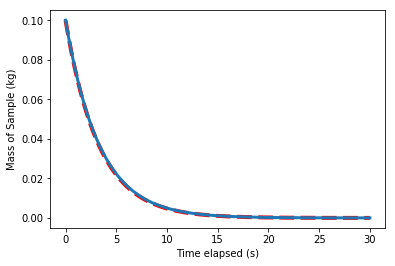

In [4]:
# Write Euler method solution code here...

### BEGIN SOLUTION

# initialise mass and time arrays + add starting boundary conditions.
massEuler = np.empty(301)
time = np.empty(301)

massEuler[0] = mass_initial
time[0] = t_start
h = 0.1

for i in range(300):
    massdash = -r_decay*massEuler[i]
    time[i+1] = time[i] + h
    massEuler[i+1] = massEuler[i] + h*massdash

# plotting the array values from the Euler method and the true solution
true_masses = np.array([0.1*np.exp(-0.3*t) for t in time])

plt.ylabel('Mass of Sample (kg)')
plt.xlabel('Time elapsed (s)')
plt.plot(time, massEuler, lw=4, c='r',linestyle='--')
plt.plot(time, true_masses, lw=3)

# Note the values aren't exactly the same as can be seen when you inspect a specific increment.
print(massEuler[150])
print(true_masses[150])

### END SOLUTION

#### Task 1A: estimating the accuracy of a numerical solution

You should write the difference between the array $M(i)$ and
the exact solution, as a function of time, to an array, and plot it to see how big
the error is. You should then decrease $h$ (remembering
to increase the size of the array).
How big is the largest difference between your numerical solution, and the
exact solution, for 300 steps and $h=0.1$~s? How big is the largest
difference when you reduce the number of steps to 100 (and so $h=0.3$~s)?

You should
find that the error varies approximately
 linearly with $h$. So the smaller is $h$ the more accurate is
the solution, but of course the slower the program runs. This is not such a big problem
for ODEs, but it is much more serious for PDEs.

Once you have the error for your chosen value of $h$, it is good idea to write
out the estimated accuracy of the solution to screen (just as you would quote error
bars in a value you determine in an experiment), for example write to the screen

${\tt solution~for~mass~estimated~to~be~accurate~to~3~decimal~places~for~timestep~=0.01}$

Note that the error on some points will be bigger than on other points, the error you write
to the terminal should be the largest error in any point.

You should also adjust the formatting of writing numbers
such as ${\tt mass}$, ${\tt time}$, etc to the screen, to be around 1 decimal place
more than the accuracy. So if the error is estimated to be in the 4th decimal place
then a good format would be ${\tt \%9.5f}$, which writes numbers to 5 decimal places.
As the accuracy will be greater for some points than for others, you will typically want 
to write numbers with a number of decimal places large enough to be larger than
the accuracy of most or all points. However, this will vary a little from one problem to
another so some judgement is often needed here.

You should use the package pyplot from matplotlib to do the relevant plotting that was imported earlier. The package is fully documented at: https://matplotlib.org/

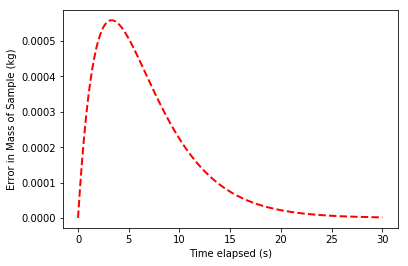

In [10]:
# Write mass error calculation and plotting code here...

### BEGIN SOLUTION
mass_error = np.empty(301)

for i in range(301):
    mass_error[i] = abs(massEuler[i]-true_masses[i])
  
plt.ylabel('Error in Mass of Sample (kg)')
plt.xlabel('Time elapsed (s)')
plt.plot(time, mass_error, lw=2, c='r',linestyle='--')
### END SOLUTION

## 4) Solving ODEs using a Python ODE solver <a class="anchor" id="ode-solver"></a>

One of the main advantages of using python is it's modularity. This coupled with it's wide use in the scientific community means that for many problems rather than having to create your own solution it is easy to import a module which has a function built in to do it for you. 

So in our case we are going to use the ${\tt scipy.integrate}$ module as this has functions that will allow us to solve our radioactive sample problem. We will be using the odeint function this function solves a system of ordinary differential equations using lsoda from the FORTRAN library odepack. In order to run it requires us to input 3 things, firstly the function of the ODE, which we need to define, so in our case:  

$$\frac{{\rm d}M(t)}{{\rm d}t}=-0.3M(t)$$

The next two inputs are the initial value of $M$ (so at $t=0$) and then the time array for which to solve for $M$. Additionally we also give it a value for rtol, this is an optional argument (unlike the previous three) which allows us to define the tolerance or error we are permitting for the solution from the ODE. If you plot the error and play around with this value you can see how it effects the directly.

Again we can check the accuracy of this by comparing it to the true values we have calculated as well as plotting it on a graph.

You'll often find that when using Python there is already a function that does whatever you're trying to do, typically it is just a matter of adjusting your problem to be in the same format. It's rare you will have a problem in which you will need to undertake entirely using your own functionality.  

### Task 2 <a class="anchor" id="Task-2"></a>

Write a python program that utilises scipy.integrate in order to solve an ODE. Compare the errors of this solution to that of the Euler method. You should find that the errors in this method are far lower, that is because all of the functions that are used in numpy and scipy have been well written to optimise both speed and accuracy (although obviously there is a trade-off between the two). How does the error compare as you change the value of rtol? What happens if instead of using rtol (relative tolerance) you pass an input of atol (absolute tolerance)?

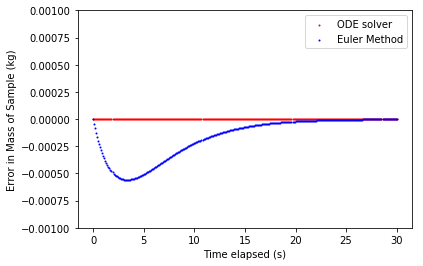

In [12]:
import scipy.integrate 

def ODE(m,t):
    dmdt = -0.3*m
    return dmdt

massODEINT = scipy.integrate.odeint(ODE, mass_initial, time, rtol=1e-5)

# Put the code to plot the errors of the two solving methods here...
### BEGIN SOLUTION
plt.ylabel('Error in Mass of Sample (kg)')
plt.xlabel('Time elapsed (s)')

plt.scatter(time, massODEINT[:,0]-true_masses, s=1, c='r', label='ODE solver')
plt.scatter(time, massEuler-true_masses, s=1, c='b', label='Euler Method')
plt.ylim([-1e-3,1e-3])
plt.legend()
### END SOLUTION

## 5) $F = ma$ as an example of a second-order differential equation <a class="anchor" id="2nd-order-ode"></a>

Here we will study the second-order ODE we get from a mass $m$ attached to a spring
of spring constant $k$

$$
\frac{{\rm d}^2x}{{\rm d}t^2}=-\frac{k}{m}x
$$

where we want to solve for the position as a function of time, $x(t)$. 
This is done by splitting it into two first-order ODEs, using

$$
\frac{{\rm d}x}{{\rm d}t}=v
$$

for $v(t)$ the velocity of the particle. Then we have two coupled
first-order ODEs

$$
\frac{{\rm d}x}{{\rm d}t}=v~~~~~~~\frac{{\rm d}v}{{\rm d}t}=-\frac{k}{m}x
$$

which we solve simultaneously for $x(t)$ and $v(t)$.
To do this we need the values of $k$ and $m$, as examples
we take $k=5$N/m and $m=1$kg. Then the two ODEs are

$$
\frac{{\rm d}x}{{\rm d}t}=v~~~~~~~\frac{{\rm d}v}{{\rm d}t}=-5x
$$

As we have two first-order ODEs we also need two BCs. Here these
are the initial positions and velocities, e.g.,
$v(t=0)=0$m/s and $x(t=0)=0.1$m.

We start with the Euler method for integrating two coupled ODEs simultaneously. The
code for one Euler step is

In [13]:
# initialising arrays
t=np.empty(2)
x=np.empty(2)
v=np.empty(2)

t[0] = 0
x[0] = 0.1
v[0] = 0
h = 0.01
i = 0

dxdt = v[i]
dvdt = -5*x[i]
t[i+1] = t[i] + h
x[i+1] = x[i] + h*dxdt
v[i+1] = v[i] + h*dvdt

Iterating this integrates the particle's position and velocity in time. Note here
${\tt x}$ and ${\tt v}$ are arrays but ${\tt dxdt}$ and ${\tt dvdt}$ are just variables.

Like the previous example this too can be done using the scipy.integrate package. However there is an added complexity due to it being second order so the function we need to define has to contain both parts of the solution we are interested in. This means you will need the function to return a list of values rather than just the one value.

### Task 3 <a class="anchor" id="Task-3"></a>

Solve the two coupled ODEs

$$
\frac{{\rm d}x}{{\rm d}t}=v~~~~~~~\frac{{\rm d}v}{{\rm d}t}=-5x
$$

with the two BCs that
are the initial positions and velocities:
$v(t=0)=0$m/s and $x(t=0)=0.1$m. Solve from $t=0$
to $t=10$s. Use 1000 steps.

First use the Euler method, then after you have checked that works,
do it using the scipy.integrate package. Make sure you understand the ODE function as it is more complicated now it is second order. 

If you compare the two solutions at the same step size
you will see that the solution using the scipy.optimise method is a lot more accurate.
The exact solution of these ODEs with these BCs is known, it is

$$
x(t)=0.1\cos(\sqrt{5}t)
$$

Show that the solution is $x(t)=0.1\cos(\sqrt{5}t)$,
by plotting the array you obtain for $x$ by numerically solving
these ODEs, as well as the $x$ values given by this function.

Plot both your calculated $x$  values and the exact $x$ values
on the same plot. If your program is working correctly and you have
chosen a small enough step length the two curves will be almost on top
of each other. You can quantify this by in addition plotting the
difference between the exact solution and your numerical solution.
How big is the largest difference between your numerical solution, and the
exact solution, for 1000 steps and $h=0.01$s? How big is the largest
difference when you reduce the number of steps to 100 (and so $h=0.1$s)?

What this task should demonstrate to you is building a model of an oscillator. Since there is no driving force it should show constant amplitude oscillations. In the assignment you will see oscillation with a driving force so variable amplitudes can be observed for instance if you make the driving force frequency equal to the natural frequency you should see that it diverges. 

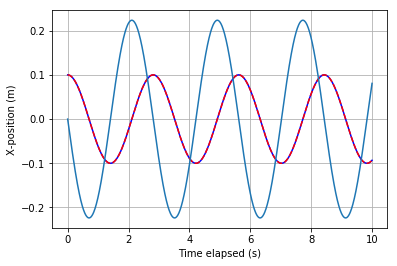

In [14]:
# Write Task 3 code here...

### BEGIN SOLUTION

def ODE(boundary_conds,t):
    x = boundary_conds[0]
    v = boundary_conds[1]
    
    # just needs to be a list with 2 items the empty lists are just used for None
    x_dot = [[],[]]
    
    x_dot[0] = v
    x_dot[1] = -5*x
    return x_dot

task3=scipy.integrate.odeint(ODE, [0.1,0], np.linspace(0,10,1000))
true_values = [0.1*np.cos(np.sqrt(5)*t) for t in np.linspace(0,10,1000)]

# plotting the x values wrt T 
plt.plot(np.linspace(0,10,1000),task3[:,0], c='b')
plt.plot(np.linspace(0,10,1000),true_values, linestyle='--', c='r')
plt.ylabel('X-position (m)')

# velocities wrt T
plt.plot(np.linspace(0,10,1000),task3[:,1])
plt.xlabel('Time elapsed (s)')
plt.grid()

### END SOLUTION